# 一、课堂代码复刻

# 数据准备

In [1]:
import pandas as pd # 数据表
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [2]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2z/lsdn7dx57vjdrcfcymdsvdbr0000gn/T/jieba.cache
Loading model cost 0.318 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


# 词向量模型

词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

In [93]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [6]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.6410849   1.134391    0.63549495 -0.38521895 -0.48411548 -2.2945507
  0.83481675  3.1726503  -1.3157034  -1.3893381  -0.3336429  -1.8243196
 -0.18684328  1.2022493   0.598506   -0.7134296   0.3007021  -0.5595516
 -0.01994558 -2.2173672   1.1168963   0.01282513  0.6737862  -0.8952448
  0.0655704  -0.05628256 -0.38469663 -1.0079409  -0.8406416  -0.05381103
  1.0220658   0.5418297   0.17517339 -0.8778696  -0.68530303  1.5700054
  0.5166897  -1.1095319  -0.9872313  -2.3975995   0.01768699 -0.6703224
 -0.03256011 -0.85881937  0.8814009  -0.75867075 -1.4133855   0.32959265
  1.1716479   0.5875439   0.32338607 -0.27204552 -1.0195835  -0.11126254
 -0.50088626  0.96015966  0.27393362  0.01050323 -0.68588376  0.51251423
  0.4488461   0.46900773 -0.36854318  0.72075504 -0.84711206  1.4924262
  0.29777688  0.9078335  -1.364205    1.6059601  -0.8072262   1.2621706
  0.70912856 -0.12783493  1.6614339   0.41359612  0.11923154 -0.14565279
 -0.50548273  0.91139007 -0.36924478  0.12987334 -0.9510

In [14]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

-0.36037835
-0.104999244
0.111444846
0.73615587
0.56135345
0.56218207


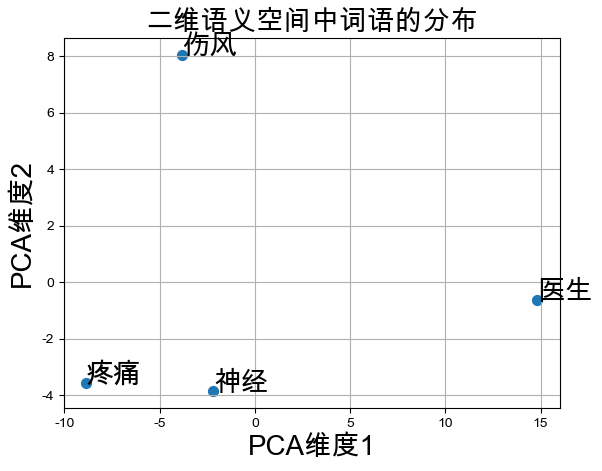

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #用于降维处理
import matplotlib

# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from matplotlib.font_manager import FontProperties
font_path = '/System/Library/Fonts/PingFang.ttc' 
custom_font = FontProperties(fname=font_path, size=14)

matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [23]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78569.96875
Loss after epoch 1: 69607.453125
Loss after epoch 2: 73491.0
Loss after epoch 3: 54889.578125
Loss after epoch 4: 55280.875
Loss after epoch 5: 51656.84375
Loss after epoch 6: 49559.21875
Loss after epoch 7: 47889.46875
Loss after epoch 8: 46272.65625
Loss after epoch 9: 44818.5
Loss after epoch 10: 43563.9375
Loss after epoch 11: 37814.9375
Loss after epoch 12: 40878.625
Loss after epoch 13: 39939.5
Loss after epoch 14: 34705.8125
Loss after epoch 15: 33448.3125
Loss after epoch 16: 36230.3125
Loss after epoch 17: 31836.0
Loss after epoch 18: 30850.5625
Loss after epoch 19: 33432.0625
Loss after epoch 20: 29443.6875
Loss after epoch 21: 31779.5625
Loss after epoch 22: 31052.8125
Loss after epoch 23: 30457.4375
Loss after epoch 24: 29591.25
Loss after epoch 25: 28839.875
Loss after epoch 26: 28106.0
Loss after epoch 27: 24942.25
Loss after epoch 28: 27006.875
Loss after epoch 29: 26652.125
Loss after epoch 30: 26334.375
Loss after epoch 31: 25697.625
Los

# 二、词嵌入模型1——铁路与殖民统治

In [114]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd # 数据表
df = pd.read_excel('railway_construction_AND_colonial_power.xlsx', header=0)
df

,title,href,year
0,Anticorruption,https://books.google.com/books?hl=zh-CN&lr=&id...,2020
1,"Exploring the Social Life of Japanese"" Manchur...",https://link.springer.com/content/pdf/10.1007/...,2020
2,Comparative media history: An introduction: 17...,https://books.google.com/books?hl=zh-CN&lr=&id...,2005
3,British Imperialism and Decolonization: a Chin...,https://link.springer.com/chapter/10.1057/9781...,2002
4,Skilled labour in colonial economies. Recruitm...,https://www.tandfonline.com/doi/abs/10.1080/00...,2022
...,...,...,...
995,"Colonial Kenya observed: British rule, Mau Mau...",https://books.google.com/books?hl=zh-CN&lr=&id...,2014
996,History of Sub-Saharan Africa's Long Journey t...,https://brill.com/view/journals/bafr/15/4/arti...,2023
997,Great power politics in the fourth industrial ...,NaN,2022
998,The plural economy and its legacy in Asia,https://library.oapen.org/bitstream/handle/20....,2012


In [116]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #去除英文停用词

def preprocess_text(text):
    text = text.lower() #小写
    text = re.sub(r'\d+', '', text) #删除数字
    text = re.sub(r'[^\w\s]', '', text) #删除标点符号
    words = text.split() #用空格分割
    words = [word for word in words if word not in stop_words and re.match(r'[a-zA-Z]+', word)]  # 去除停用词和非字母单词
    text = ' '.join(words)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
df['title'] = df['title'].astype(str) #将对象转化为字符串类型
df['title_new'] = df['title'].apply(preprocess_text) #执行清洗操作
df.head()

,title,href,year,title_new
0,Anticorruption,https://books.google.com/books?hl=zh-CN&lr=&id...,2020,anticorruption
1,"Exploring the Social Life of Japanese"" Manchur...",https://link.springer.com/content/pdf/10.1007/...,2020,exploring social life japanese manchurian immi...
2,Comparative media history: An introduction: 17...,https://books.google.com/books?hl=zh-CN&lr=&id...,2005,comparative media history introduction present
3,British Imperialism and Decolonization: a Chin...,https://link.springer.com/chapter/10.1057/9781...,2002,british imperialism decolonization chinese per...
4,Skilled labour in colonial economies. Recruitm...,https://www.tandfonline.com/doi/abs/10.1080/00...,2022,skilled labour colonial economies recruitment ...


In [118]:
text_column = 'title_new'

## 分词

In [119]:
from nltk.tokenize import word_tokenize
import nltk

# 确保已经下载了nltk的tokenizers
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sharon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
# 定义一个分词函数
def tokenize_text(text):
    # 确保文本是字符串类型
    if not isinstance(text, str):
        text = str(text)  # 转换非字符串类型为字符串
    # 使用nltk进行分词
    return word_tokenize(text)

# 应用分词函数到指定列
df[text_column + '_tokens'] = df[text_column].apply(tokenize_text)
df


,title,href,year,title_new,title_new_tokens
0,Anticorruption,https://books.google.com/books?hl=zh-CN&lr=&id...,2020,anticorruption,[anticorruption]
1,"Exploring the Social Life of Japanese"" Manchur...",https://link.springer.com/content/pdf/10.1007/...,2020,exploring social life japanese manchurian immi...,"[exploring, social, life, japanese, manchurian..."
2,Comparative media history: An introduction: 17...,https://books.google.com/books?hl=zh-CN&lr=&id...,2005,comparative media history introduction present,"[comparative, media, history, introduction, pr..."
3,British Imperialism and Decolonization: a Chin...,https://link.springer.com/chapter/10.1057/9781...,2002,british imperialism decolonization chinese per...,"[british, imperialism, decolonization, chinese..."
4,Skilled labour in colonial economies. Recruitm...,https://www.tandfonline.com/doi/abs/10.1080/00...,2022,skilled labour colonial economies recruitment ...,"[skilled, labour, colonial, economies, recruit..."
...,...,...,...,...,...
995,"Colonial Kenya observed: British rule, Mau Mau...",https://books.google.com/books?hl=zh-CN&lr=&id...,2014,colonial kenya observed british rule mau mau w...,"[colonial, kenya, observed, british, rule, mau..."
996,History of Sub-Saharan Africa's Long Journey t...,https://brill.com/view/journals/bafr/15/4/arti...,2023,history subsaharan africas long journey toward...,"[history, subsaharan, africas, long, journey, ..."
997,Great power politics in the fourth industrial ...,NaN,2022,great power politics fourth industrial revolut...,"[great, power, politics, fourth, industrial, r..."
998,The plural economy and its legacy in Asia,https://library.oapen.org/bitstream/handle/20....,2012,plural economy legacy asia,"[plural, economy, legacy, asia]"


## 词向量模型

In [121]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [123]:
corpus = df['title_new_tokens']
for document in corpus[:5]:
    print(document)

['anticorruption']
['exploring', 'social', 'life', 'japanese', 'manchurian', 'immigrants']
['comparative', 'media', 'history', 'introduction', 'present']
['british', 'imperialism', 'decolonization', 'chinese', 'perspective']
['skilled', 'labour', 'colonial', 'economies', 'recruitment', 'education', 'employment', 'construction', 'companies', 'german', 'colonial', 'west', 'africa', 'c']


In [124]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [125]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

colonial: [-0.01604662  0.03089988  0.01056053  0.01529846 -0.00837597 -0.05215831
  0.02734143  0.0677591  -0.02594678 -0.02102994 -0.0072899  -0.05590078
 -0.00973533  0.02231069  0.00808039 -0.03051955  0.00631827 -0.0361956
 -0.00904821 -0.05486099  0.03361551  0.01872972  0.02254272 -0.00790237
  0.00556434 -0.00193038 -0.02367    -0.0142752  -0.03730204 -0.00410459
  0.02297763  0.00966691  0.01527065 -0.03555943 -0.01429212  0.02490919
  0.01700739 -0.02265775 -0.02141104 -0.05330011 -0.00617146 -0.0142512
 -0.0193376  -0.00593042  0.02582088 -0.01341827 -0.03027898 -0.00162045
  0.01889614  0.03247089  0.00044139 -0.01367296 -0.01642617 -0.01261732
 -0.00781759  0.00817854  0.02411555 -0.01974921 -0.03354779  0.01488409
  0.0037633   0.00681879 -0.01087907 -0.00371732 -0.04155154  0.02120936
 -0.00455893  0.0184495  -0.0405026   0.03657033 -0.00731732  0.02255348
  0.02933441 -0.0153482   0.03938451  0.01904536  0.0156209  -0.00630317
 -0.0367803  -0.00992066 -0.02055729 -0.007

In [17]:
print(model.wv.similarity('india', 'political'))
print(model.wv.similarity('india', 'nineteenth'))
print(model.wv.similarity('india', 'imperial'))
print(model.wv.similarity('political', 'nineteenth'))
print(model.wv.similarity('political', 'imperial'))
print(model.wv.similarity('colonial', 'imperial'))

0.99877113
0.98856246
0.9984679
0.986995
0.998517
0.9969502


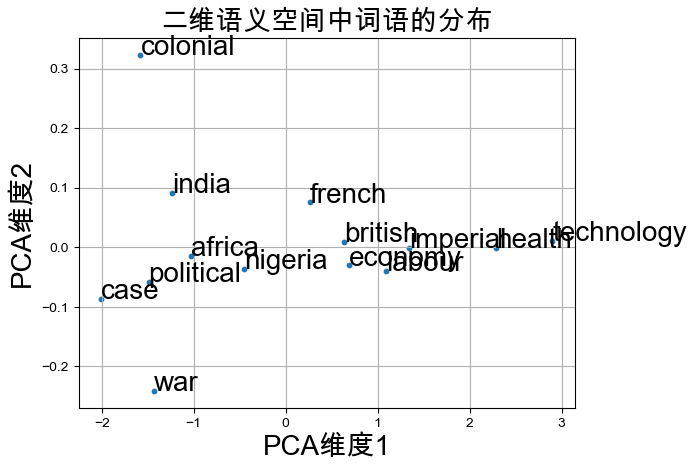

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #用于降维处理
import matplotlib

# 可视化

words = ['india','africa', 'nigeria', 'british', 'french','political', 'labour','economy', 'war', 'health','technology','case', 'imperial','colonial']
vectors = [model.wv[word] for word in words]

from matplotlib.font_manager import FontProperties
font_path = '/System/Library/Fonts/PingFang.ttc' 
custom_font = FontProperties(fname=font_path, size=12)

matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 10)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [19]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 26969.544921875
Loss after epoch 1: 27104.595703125
Loss after epoch 2: 26951.734375
Loss after epoch 3: 26896.609375
Loss after epoch 4: 27030.828125
Loss after epoch 5: 27050.953125
Loss after epoch 6: 26964.75
Loss after epoch 7: 26912.109375
Loss after epoch 8: 26888.765625
Loss after epoch 9: 27137.140625
Loss after epoch 10: 27383.59375
Loss after epoch 11: 27381.0
Loss after epoch 12: 27066.84375
Loss after epoch 13: 26781.34375
Loss after epoch 14: 26442.25
Loss after epoch 15: 26007.875
Loss after epoch 16: 25501.25
Loss after epoch 17: 25035.375
Loss after epoch 18: 24459.40625
Loss after epoch 19: 23758.96875
Loss after epoch 20: 23177.375
Loss after epoch 21: 22621.375
Loss after epoch 22: 22043.6875
Loss after epoch 23: 21631.6875
Loss after epoch 24: 21236.6875
Loss after epoch 25: 20890.9375
Loss after epoch 26: 20560.5
Loss after epoch 27: 20315.25
Loss after epoch 28: 20016.625
Loss after epoch 29: 19850.75
Loss after epoch 30: 19738.5625
Loss after

# 三、词嵌入模型2——铁路与反殖民斗争

In [34]:
import pandas as pd # 数据表
df = pd.read_excel('colonial_railways_OR_anti-colonial_struggle.xlsx', header=0)
df

,title,href,year
0,Aid in Sino-African Relations: An Analysis of ...,https://search.ebscohost.com/login.aspx?direct...,2011
1,Competing Truths in Northern Ireland,https://digitalcollections.sit.edu/isp_collect...,2007
2,Protests in 21st Century,https://heinonline.org/hol-cgi-bin/get_pdf.cgi...,2020
3,Tracing fragments in the visual culture of ant...,http://shura.shu.ac.uk/id/eprint/10495,2006
4,Cultural accommodation and self-translation in...,https://www.torrossa.com/gs/resourceProxy?an=5...,-1
...,...,...,...
994,Love and Revolution in the Twentieth-Century C...,https://books.google.com/books?hl=zh-CN&lr=&id...,2021
995,"Nationalism, anti-colonialism and the crystall...",https://www.tandfonline.com/doi/abs/10.1080/14...,2013
996,"A narchism, I ndia",https://onlinelibrary.wiley.com/doi/abs/10.100...,2009
997,The politics of accessing leadership the niger...,https://dspace.unijos.edu.ng/jspui/bitstream/1...,2013


In [35]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #去除英文停用词

def preprocess_text(text):
    text = text.lower() #小写
    text = re.sub(r'\d+', '', text) #删除数字
    text = re.sub(r'[^\w\s]', '', text) #删除标点符号
    words = text.split() #用空格分割
    words = [word for word in words if word not in stop_words and re.match(r'[a-zA-Z]+', word)]  # 去除停用词和非字母单词
    text = ' '.join(words)
    return text

[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>


In [36]:
df['title'] = df['title'].astype(str) #将对象转化为字符串类型
df['title_new'] = df['title'].apply(preprocess_text) #执行清洗操作
df.head()

,title,href,year,title_new
0,Aid in Sino-African Relations: An Analysis of ...,https://search.ebscohost.com/login.aspx?direct...,2011,aid sinoafrican relations analysis promptings ...
1,Competing Truths in Northern Ireland,https://digitalcollections.sit.edu/isp_collect...,2007,competing truths northern ireland
2,Protests in 21st Century,https://heinonline.org/hol-cgi-bin/get_pdf.cgi...,2020,protests st century
3,Tracing fragments in the visual culture of ant...,http://shura.shu.ac.uk/id/eprint/10495,2006,tracing fragments visual culture anticolonial ...
4,Cultural accommodation and self-translation in...,https://www.torrossa.com/gs/resourceProxy?an=5...,-1,cultural accommodation selftranslation work la...


In [37]:
text_column = 'title_new'

In [38]:
from nltk.tokenize import word_tokenize
import nltk

# 确保已经下载了nltk的tokenizers
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


False

In [39]:
# 定义一个分词函数
def tokenize_text(text):
    # 确保文本是字符串类型
    if not isinstance(text, str):
        text = str(text)  # 转换非字符串类型为字符串
    # 使用nltk进行分词
    return word_tokenize(text)

# 应用分词函数到指定列
df[text_column + '_tokens'] = df[text_column].apply(tokenize_text)
df


,title,href,year,title_new,title_new_tokens
0,Aid in Sino-African Relations: An Analysis of ...,https://search.ebscohost.com/login.aspx?direct...,2011,aid sinoafrican relations analysis promptings ...,"[aid, sinoafrican, relations, analysis, prompt..."
1,Competing Truths in Northern Ireland,https://digitalcollections.sit.edu/isp_collect...,2007,competing truths northern ireland,"[competing, truths, northern, ireland]"
2,Protests in 21st Century,https://heinonline.org/hol-cgi-bin/get_pdf.cgi...,2020,protests st century,"[protests, st, century]"
3,Tracing fragments in the visual culture of ant...,http://shura.shu.ac.uk/id/eprint/10495,2006,tracing fragments visual culture anticolonial ...,"[tracing, fragments, visual, culture, anticolo..."
4,Cultural accommodation and self-translation in...,https://www.torrossa.com/gs/resourceProxy?an=5...,-1,cultural accommodation selftranslation work la...,"[cultural, accommodation, selftranslation, wor..."
...,...,...,...,...,...
994,Love and Revolution in the Twentieth-Century C...,https://books.google.com/books?hl=zh-CN&lr=&id...,2021,love revolution twentiethcentury colonial post...,"[love, revolution, twentiethcentury, colonial,..."
995,"Nationalism, anti-colonialism and the crystall...",https://www.tandfonline.com/doi/abs/10.1080/14...,2013,nationalism anticolonialism crystallisation gr...,"[nationalism, anticolonialism, crystallisation..."
996,"A narchism, I ndia",https://onlinelibrary.wiley.com/doi/abs/10.100...,2009,narchism ndia,"[narchism, ndia]"
997,The politics of accessing leadership the niger...,https://dspace.unijos.edu.ng/jspui/bitstream/1...,2013,politics accessing leadership nigerian context,"[politics, accessing, leadership, nigerian, co..."


In [40]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [41]:
corpus = df['title_new_tokens'].apply(lambda x: x)
for document in corpus[:5]:
    print(document)

['aid', 'sinoafrican', 'relations', 'analysis', 'promptings', 'pluses', 'problems', 'chinas', 'aid', 'africa']
['competing', 'truths', 'northern', 'ireland']
['protests', 'st', 'century']
['tracing', 'fragments', 'visual', 'culture', 'anticolonial', 'struggle', 'britain']
['cultural', 'accommodation', 'selftranslation', 'work', 'layla', 'abū', 'zayd']


In [42]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [43]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

anticolonial: [-4.50415118e-03  4.41437867e-03  8.48110858e-03  8.19640607e-03
 -6.86928956e-03 -1.85482707e-02  1.03468737e-02  2.30163746e-02
 -1.00162383e-02 -7.20318966e-03  7.81316496e-03 -1.09035987e-02
 -4.75474726e-03  1.27899172e-02 -3.36656440e-03 -7.34231761e-03
  5.62511664e-03 -8.22722726e-03 -8.20942130e-03 -2.16145348e-02
  1.09595871e-02  8.41905270e-03  1.23628424e-02 -1.08531804e-03
  5.85071836e-03 -4.00541956e-03 -4.11063200e-03  2.17326335e-03
 -1.46571798e-02 -3.87413148e-03  5.36037434e-04 -2.05903125e-04
  1.08726313e-02 -1.28173502e-02 -3.33022792e-03  3.15742008e-03
  1.05367638e-02 -1.01778693e-02 -3.48807499e-03 -1.51716163e-02
 -8.17194209e-03 -3.33108583e-05 -1.21142585e-02 -3.15601588e-03
  6.02649059e-03 -1.15070737e-03 -1.26184477e-02  1.17472867e-02
  8.60922690e-03  1.49707794e-02 -8.13060813e-03 -1.00477692e-03
 -7.37288035e-03 -1.39675755e-03  4.90807323e-03  1.33168022e-03
  7.49643892e-03 -8.59601423e-03 -9.82536469e-03  1.07285054e-02
 -3.6078188

In [44]:
print(model.wv.similarity('anticolonial', 'struggle'))
print(model.wv.similarity('anticolonial', 'africa'))
print(model.wv.similarity('anticolonial', 'competing'))
print(model.wv.similarity('struggle', 'africa'))
print(model.wv.similarity('struggle', 'competing'))
print(model.wv.similarity('africa', 'competing'))

0.5240608
0.47315645
0.029266924
0.44942653
0.20898442
0.05340431


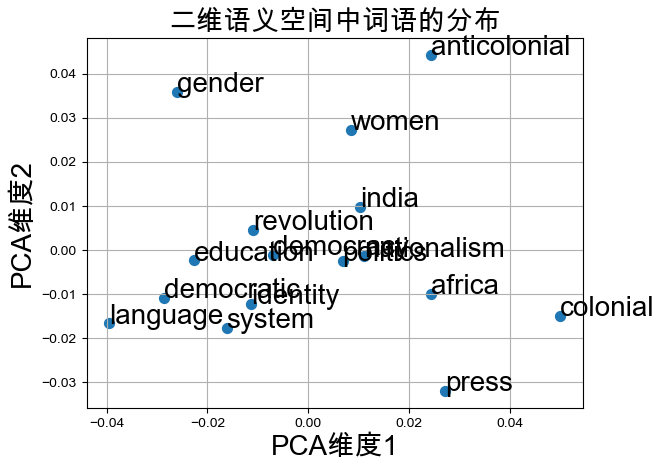

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #用于降维处理
import matplotlib

# 可视化

words = ['india','africa','press', 'women', 'education','democracy', 'politics', 'gender', 'democratic', 'system', 'language', 'revolution', 'nationalism', 'identity', 'colonial', 'anticolonial']
vectors = [model.wv[word] for word in words]

from matplotlib.font_manager import FontProperties
font_path = '/System/Library/Fonts/PingFang.ttc' 
custom_font = FontProperties(fname=font_path, size=14)

matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [16]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 26969.544921875
Loss after epoch 1: 27104.595703125
Loss after epoch 2: 26951.734375
Loss after epoch 3: 26896.609375
Loss after epoch 4: 27030.828125
Loss after epoch 5: 27050.953125
Loss after epoch 6: 26964.75
Loss after epoch 7: 26912.109375
Loss after epoch 8: 26888.765625
Loss after epoch 9: 27137.140625
Loss after epoch 10: 27383.59375
Loss after epoch 11: 27381.0
Loss after epoch 12: 27066.84375
Loss after epoch 13: 26781.34375
Loss after epoch 14: 26442.25
Loss after epoch 15: 26007.875
Loss after epoch 16: 25501.25
Loss after epoch 17: 25035.375
Loss after epoch 18: 24459.40625
Loss after epoch 19: 23758.96875
Loss after epoch 20: 23177.375
Loss after epoch 21: 22621.375
Loss after epoch 22: 22043.6875
Loss after epoch 23: 21631.6875
Loss after epoch 24: 21236.6875
Loss after epoch 25: 20890.9375
Loss after epoch 26: 20560.5
Loss after epoch 27: 20315.25
Loss after epoch 28: 20016.625
Loss after epoch 29: 19850.75
Loss after epoch 30: 19738.5625
Loss after